Dataset source is [here](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [34]:
# Import packages
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# imbalanced dataset
from imblearn.over_sampling import SMOTE

# Modelling
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No NULL values

In [7]:
class_count = df['Class'].value_counts()
print(class_count)

0    284315
1       492
Name: Class, dtype: int64


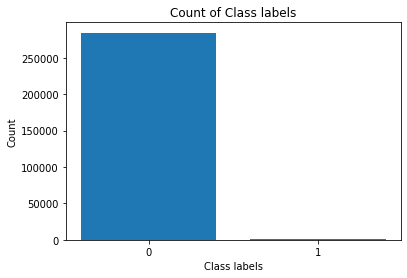

In [8]:
plt.bar([str(x) for x in class_count.index], class_count.values)
plt.title("Count of Class labels")
plt.xlabel("Class labels")
plt.ylabel("Count")
plt.show()

Imbalanced dataset

## Column distributions

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


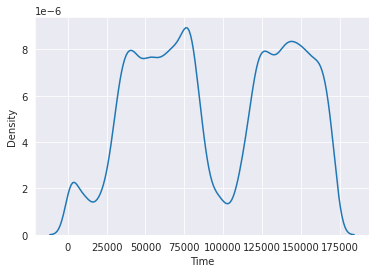




count    2.848070e+05
mean     3.918649e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64


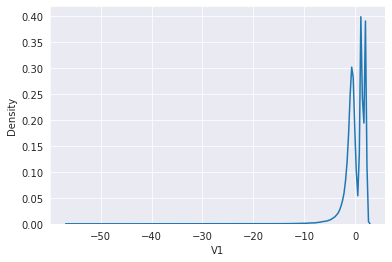




count    2.848070e+05
mean     5.682686e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64


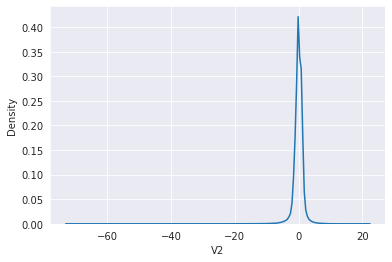




count    2.848070e+05
mean    -8.761736e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64


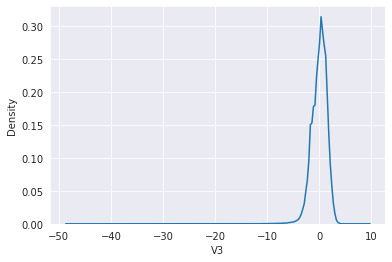




count    2.848070e+05
mean     2.811118e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64


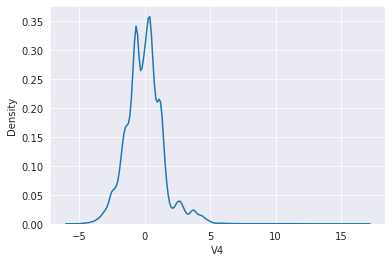




count    2.848070e+05
mean    -1.552103e-15
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.433583e-02
75%      6.119264e-01
max      3.480167e+01
Name: V5, dtype: float64


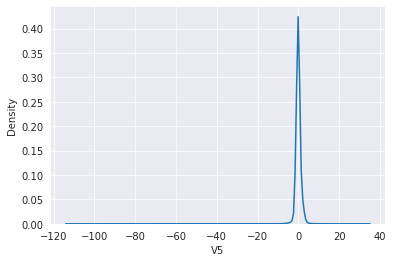




count    2.848070e+05
mean     2.040130e-15
std      1.332271e+00
min     -2.616051e+01
25%     -7.682956e-01
50%     -2.741871e-01
75%      3.985649e-01
max      7.330163e+01
Name: V6, dtype: float64


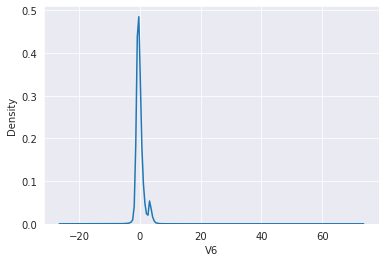




count    2.848070e+05
mean    -1.698953e-15
std      1.237094e+00
min     -4.355724e+01
25%     -5.540759e-01
50%      4.010308e-02
75%      5.704361e-01
max      1.205895e+02
Name: V7, dtype: float64


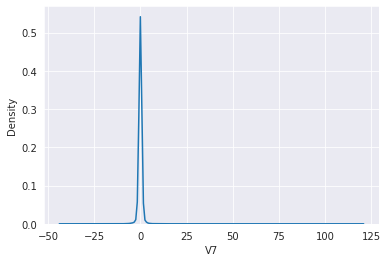




count    2.848070e+05
mean    -1.893285e-16
std      1.194353e+00
min     -7.321672e+01
25%     -2.086297e-01
50%      2.235804e-02
75%      3.273459e-01
max      2.000721e+01
Name: V8, dtype: float64


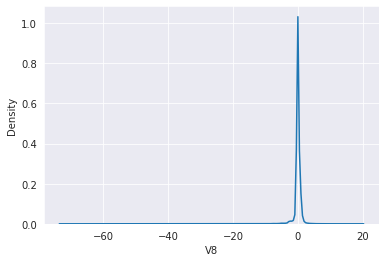




count    2.848070e+05
mean    -3.147640e-15
std      1.098632e+00
min     -1.343407e+01
25%     -6.430976e-01
50%     -5.142873e-02
75%      5.971390e-01
max      1.559499e+01
Name: V9, dtype: float64


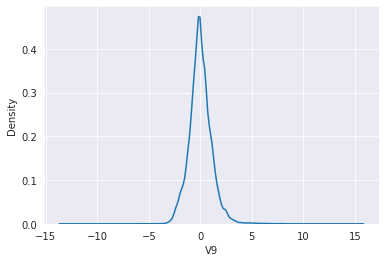




count    2.848070e+05
mean     1.772925e-15
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64


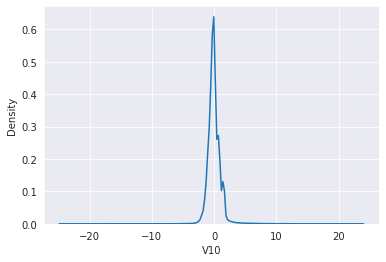




count    2.848070e+05
mean     9.289524e-16
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64


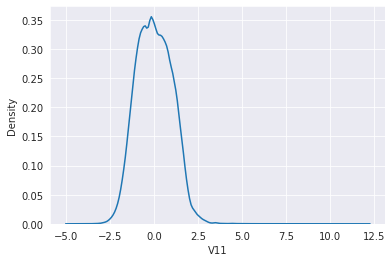




count    2.848070e+05
mean    -1.803266e-15
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64


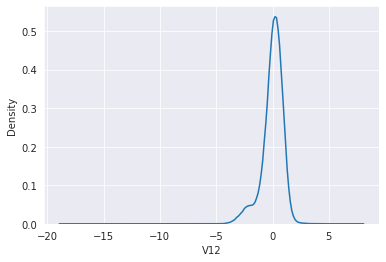




count    2.848070e+05
mean     1.674888e-15
std      9.952742e-01
min     -5.791881e+00
25%     -6.485393e-01
50%     -1.356806e-02
75%      6.625050e-01
max      7.126883e+00
Name: V13, dtype: float64


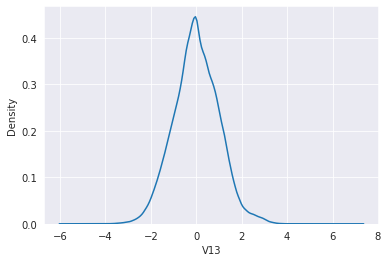




count    2.848070e+05
mean     1.475621e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64


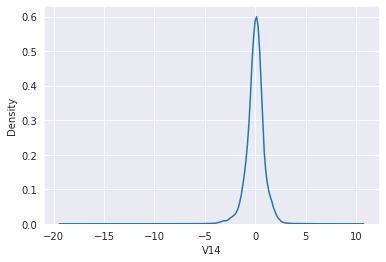




count    2.848070e+05
mean     3.501098e-15
std      9.153160e-01
min     -4.498945e+00
25%     -5.828843e-01
50%      4.807155e-02
75%      6.488208e-01
max      8.877742e+00
Name: V15, dtype: float64


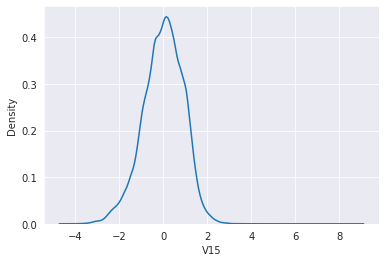




count    2.848070e+05
mean     1.392460e-15
std      8.762529e-01
min     -1.412985e+01
25%     -4.680368e-01
50%      6.641332e-02
75%      5.232963e-01
max      1.731511e+01
Name: V16, dtype: float64


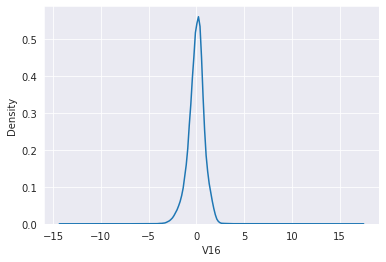




count    2.848070e+05
mean    -7.466538e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64


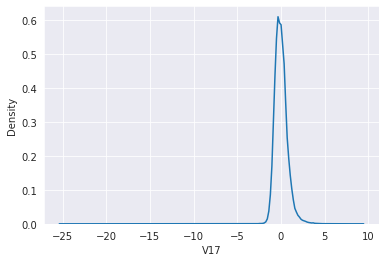




count    2.848070e+05
mean     4.258754e-16
std      8.381762e-01
min     -9.498746e+00
25%     -4.988498e-01
50%     -3.636312e-03
75%      5.008067e-01
max      5.041069e+00
Name: V18, dtype: float64


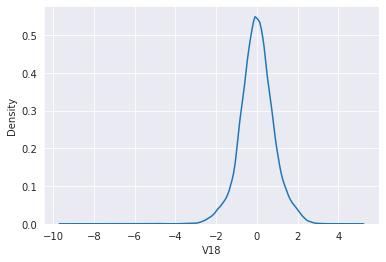




count    2.848070e+05
mean     9.019919e-16
std      8.140405e-01
min     -7.213527e+00
25%     -4.562989e-01
50%      3.734823e-03
75%      4.589494e-01
max      5.591971e+00
Name: V19, dtype: float64


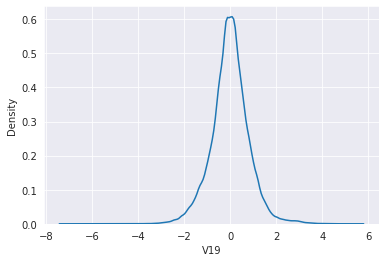




count    2.848070e+05
mean     5.126845e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64


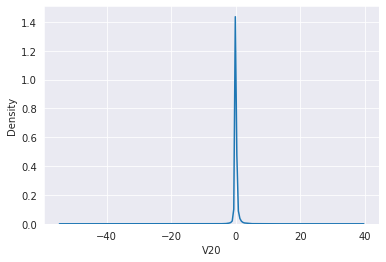




count    2.848070e+05
mean     1.473120e-16
std      7.345240e-01
min     -3.483038e+01
25%     -2.283949e-01
50%     -2.945017e-02
75%      1.863772e-01
max      2.720284e+01
Name: V21, dtype: float64


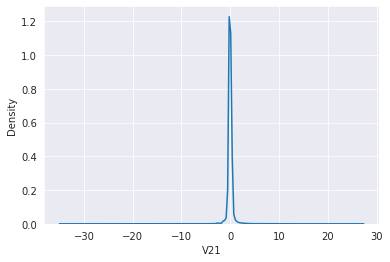




count    2.848070e+05
mean     8.042109e-16
std      7.257016e-01
min     -1.093314e+01
25%     -5.423504e-01
50%      6.781943e-03
75%      5.285536e-01
max      1.050309e+01
Name: V22, dtype: float64


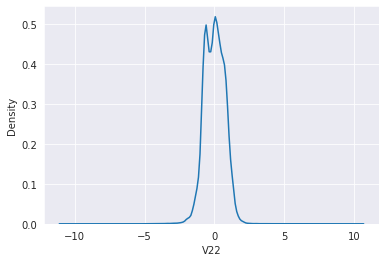




count    2.848070e+05
mean     5.282512e-16
std      6.244603e-01
min     -4.480774e+01
25%     -1.618463e-01
50%     -1.119293e-02
75%      1.476421e-01
max      2.252841e+01
Name: V23, dtype: float64


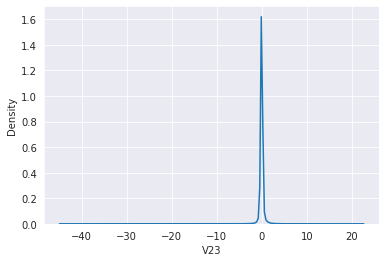




count    2.848070e+05
mean     4.456271e-15
std      6.056471e-01
min     -2.836627e+00
25%     -3.545861e-01
50%      4.097606e-02
75%      4.395266e-01
max      4.584549e+00
Name: V24, dtype: float64


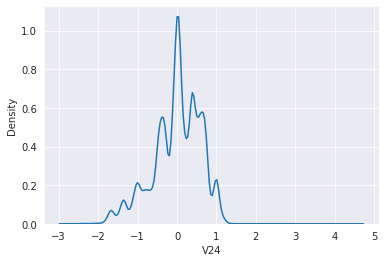




count    2.848070e+05
mean     1.426896e-15
std      5.212781e-01
min     -1.029540e+01
25%     -3.171451e-01
50%      1.659350e-02
75%      3.507156e-01
max      7.519589e+00
Name: V25, dtype: float64


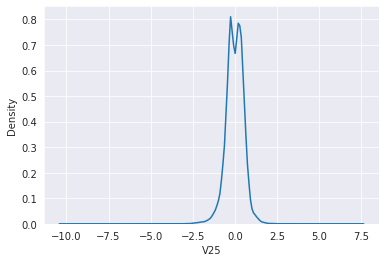




count    2.848070e+05
mean     1.701640e-15
std      4.822270e-01
min     -2.604551e+00
25%     -3.269839e-01
50%     -5.213911e-02
75%      2.409522e-01
max      3.517346e+00
Name: V26, dtype: float64


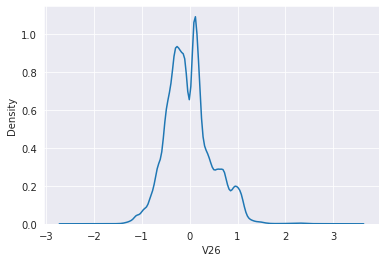




count    2.848070e+05
mean    -3.662252e-16
std      4.036325e-01
min     -2.256568e+01
25%     -7.083953e-02
50%      1.342146e-03
75%      9.104512e-02
max      3.161220e+01
Name: V27, dtype: float64


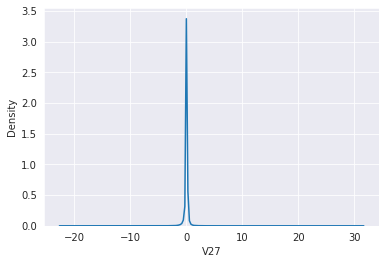




count    2.848070e+05
mean    -1.217809e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64


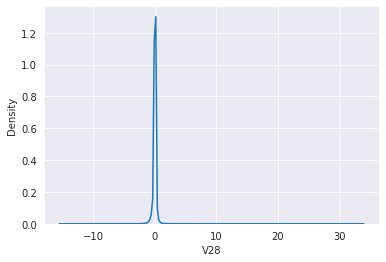




count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


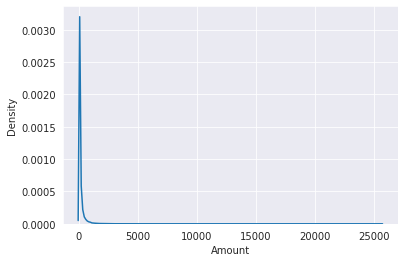




count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


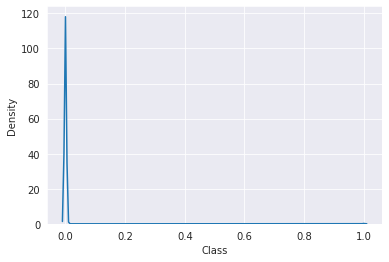

In [9]:
sns.set_style('darkgrid')
for col in df.columns:
    print(df[col].describe())
    sns.kdeplot(x=col, data=df)
    plt.show()
    print("\n\n")

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


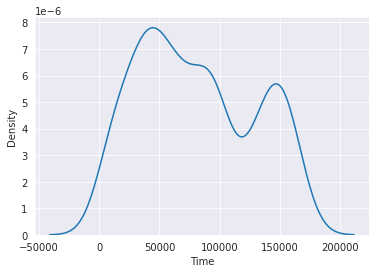




count    492.000000
mean      -4.771948
std        6.783687
min      -30.552380
25%       -6.036063
50%       -2.342497
75%       -0.419200
max        2.132386
Name: V1, dtype: float64


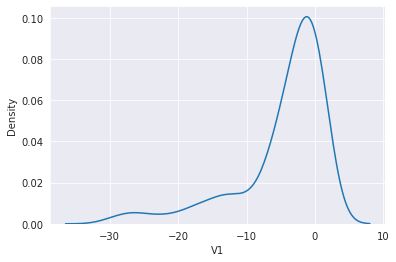




count    492.000000
mean       3.623778
std        4.291216
min       -8.402154
25%        1.188226
50%        2.717869
75%        4.971257
max       22.057729
Name: V2, dtype: float64


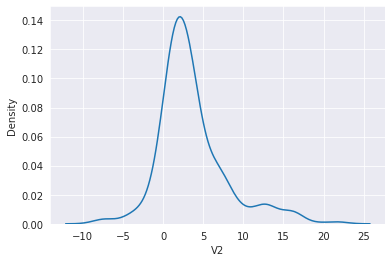




count    492.000000
mean      -7.033281
std        7.110937
min      -31.103685
25%       -8.643489
50%       -5.075257
75%       -2.276185
max        2.250210
Name: V3, dtype: float64


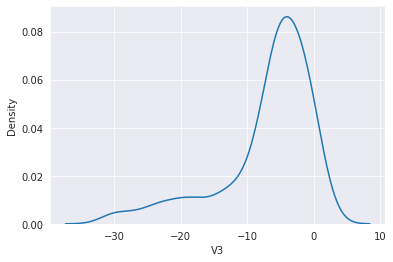




count    492.000000
mean       4.542029
std        2.873318
min       -1.313275
25%        2.373050
50%        4.177147
75%        6.348729
max       12.114672
Name: V4, dtype: float64


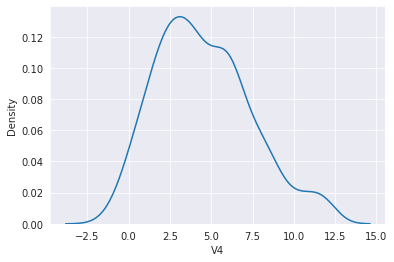




count    492.000000
mean      -3.151225
std        5.372468
min      -22.105532
25%       -4.792835
50%       -1.522962
75%        0.214562
max       11.095089
Name: V5, dtype: float64


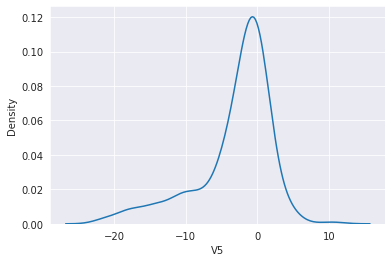




count    492.000000
mean      -1.397737
std        1.858124
min       -6.406267
25%       -2.501511
50%       -1.424616
75%       -0.413216
max        6.474115
Name: V6, dtype: float64


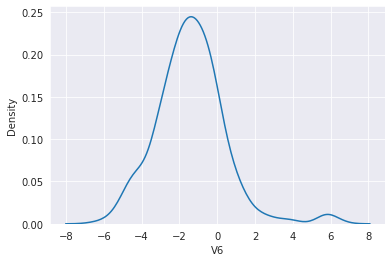




count    492.000000
mean      -5.568731
std        7.206773
min      -43.557242
25%       -7.965295
50%       -3.034402
75%       -0.945954
max        5.802537
Name: V7, dtype: float64


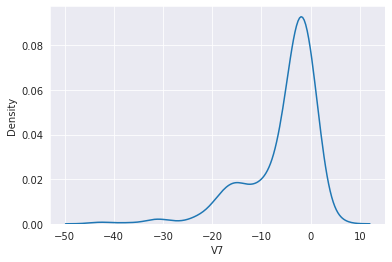




count    492.000000
mean       0.570636
std        6.797831
min      -41.044261
25%       -0.195336
50%        0.621508
75%        1.764879
max       20.007208
Name: V8, dtype: float64


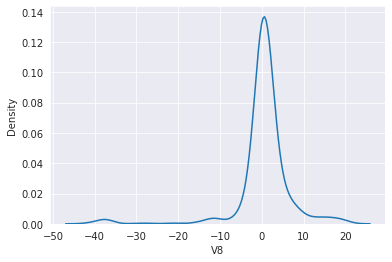




count    492.000000
mean      -2.581123
std        2.500896
min      -13.434066
25%       -3.872383
50%       -2.208768
75%       -0.787850
max        3.353525
Name: V9, dtype: float64


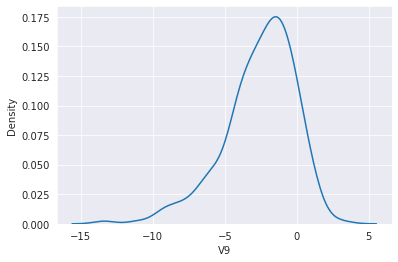




count    492.000000
mean      -5.676883
std        4.897341
min      -24.588262
25%       -7.756698
50%       -4.578825
75%       -2.614184
max        4.031435
Name: V10, dtype: float64


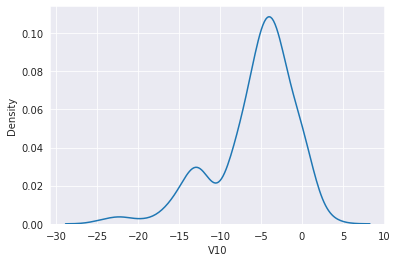




count    492.000000
mean       3.800173
std        2.678605
min       -1.702228
25%        1.973397
50%        3.586218
75%        5.307078
max       12.018913
Name: V11, dtype: float64


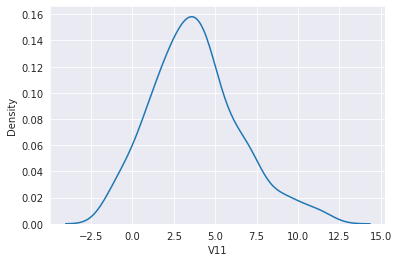




count    492.000000
mean      -6.259393
std        4.654458
min      -18.683715
25%       -8.688177
50%       -5.502530
75%       -2.974088
max        1.375941
Name: V12, dtype: float64


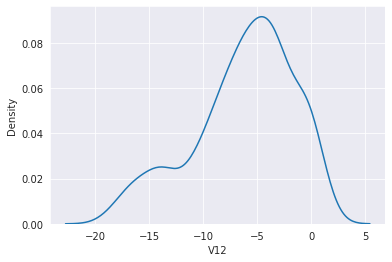




count    492.000000
mean      -0.109334
std        1.104518
min       -3.127795
25%       -0.979117
50%       -0.065566
75%        0.672964
max        2.815440
Name: V13, dtype: float64


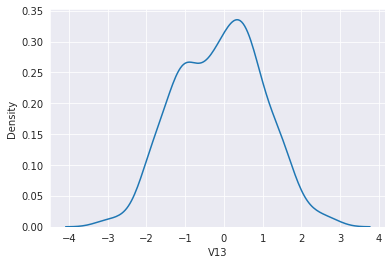




count    492.000000
mean      -6.971723
std        4.278940
min      -19.214325
25%       -9.692723
50%       -6.729720
75%       -4.282821
max        3.442422
Name: V14, dtype: float64


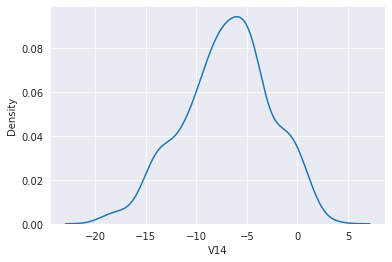




count    492.000000
mean      -0.092929
std        1.049915
min       -4.498945
25%       -0.643539
50%       -0.057227
75%        0.609189
max        2.471358
Name: V15, dtype: float64


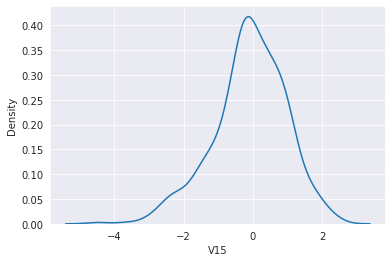




count    492.000000
mean      -4.139946
std        3.865035
min      -14.129855
25%       -6.562915
50%       -3.549795
75%       -1.226043
max        3.139656
Name: V16, dtype: float64


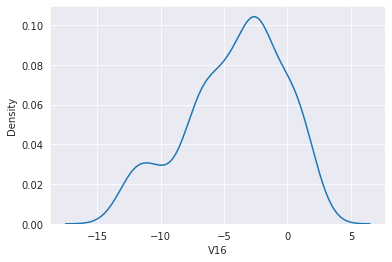




count    492.000000
mean      -6.665836
std        6.970618
min      -25.162799
25%      -11.945057
50%       -5.302949
75%       -1.341940
max        6.739384
Name: V17, dtype: float64


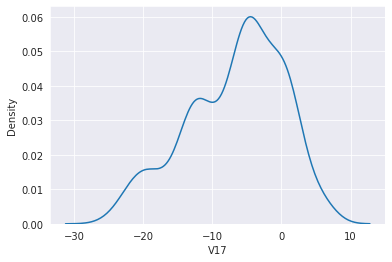




count    492.000000
mean      -2.246308
std        2.899366
min       -9.498746
25%       -4.664576
50%       -1.664346
75%        0.091772
max        3.790316
Name: V18, dtype: float64


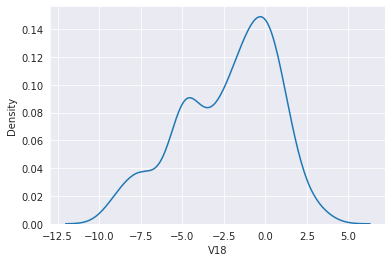




count    492.000000
mean       0.680659
std        1.539853
min       -3.681904
25%       -0.299423
50%        0.646807
75%        1.649318
max        5.228342
Name: V19, dtype: float64


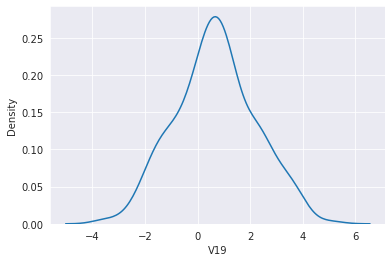




count    492.000000
mean       0.372319
std        1.346635
min       -4.128186
25%       -0.171760
50%        0.284693
75%        0.822445
max       11.059004
Name: V20, dtype: float64


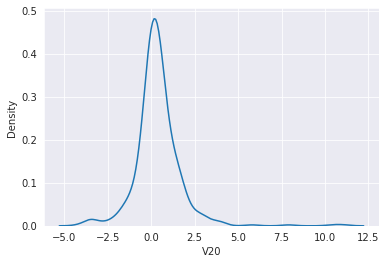




count    492.000000
mean       0.713588
std        3.869304
min      -22.797604
25%        0.041787
50%        0.592146
75%        1.244611
max       27.202839
Name: V21, dtype: float64


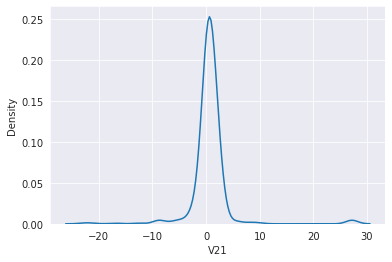




count    492.000000
mean       0.014049
std        1.494602
min       -8.887017
25%       -0.533764
50%        0.048434
75%        0.617474
max        8.361985
Name: V22, dtype: float64


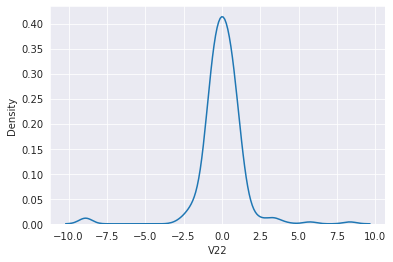




count    492.000000
mean      -0.040308
std        1.579642
min      -19.254328
25%       -0.342175
50%       -0.073135
75%        0.308378
max        5.466230
Name: V23, dtype: float64


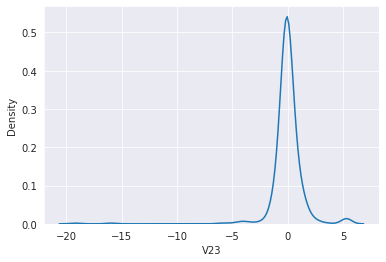




count    492.000000
mean      -0.105130
std        0.515577
min       -2.028024
25%       -0.436809
50%       -0.060795
75%        0.285328
max        1.091435
Name: V24, dtype: float64


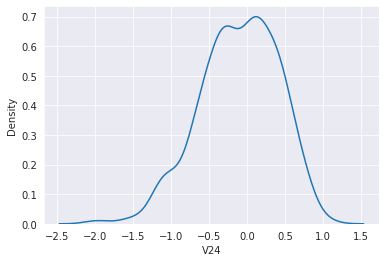




count    492.000000
mean       0.041449
std        0.797205
min       -4.781606
25%       -0.314348
50%        0.088371
75%        0.456515
max        2.208209
Name: V25, dtype: float64


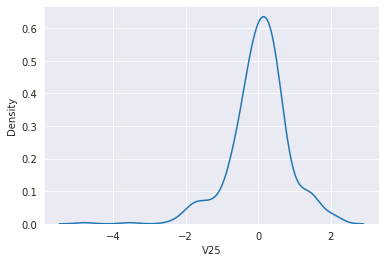




count    492.000000
mean       0.051648
std        0.471679
min       -1.152671
25%       -0.259416
50%        0.004321
75%        0.396733
max        2.745261
Name: V26, dtype: float64


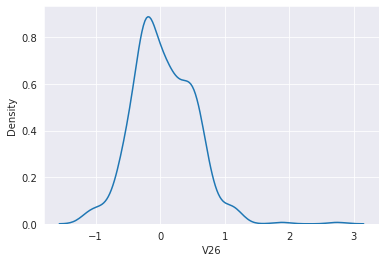




count    492.000000
mean       0.170575
std        1.376766
min       -7.263482
25%       -0.020025
50%        0.394926
75%        0.826029
max        3.052358
Name: V27, dtype: float64


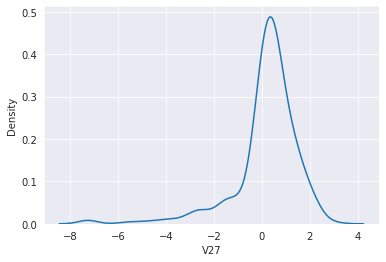




count    492.000000
mean       0.075667
std        0.547291
min       -1.869290
25%       -0.108868
50%        0.146344
75%        0.381152
max        1.779364
Name: V28, dtype: float64


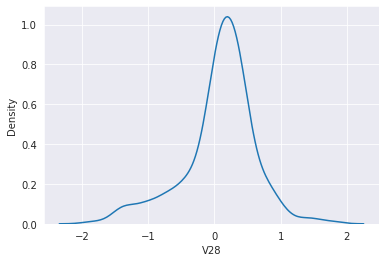




count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


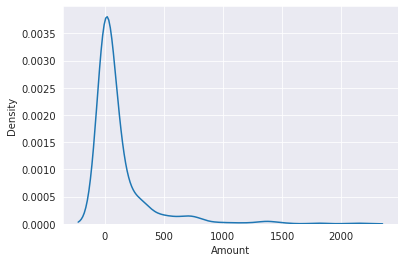




count    492.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


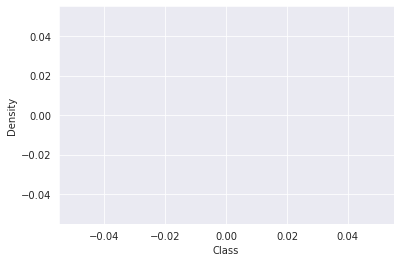

In [10]:
# column distributions of fraud cases
for col in df.columns:
    print(df.loc[df['Class']==1,col].describe())
    sns.kdeplot(x=col, data=df[df['Class']==1])
    plt.show()
    print("\n\n")

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


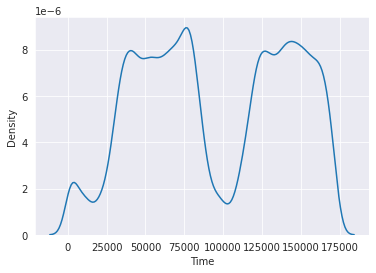




count    284315.000000
mean          0.008258
std           1.929814
min         -56.407510
25%          -0.917544
50%           0.020023
75%           1.316218
max           2.454930
Name: V1, dtype: float64


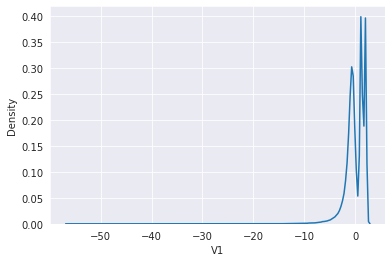




count    284315.000000
mean         -0.006271
std           1.636146
min         -72.715728
25%          -0.599473
50%           0.064070
75%           0.800446
max          18.902453
Name: V2, dtype: float64


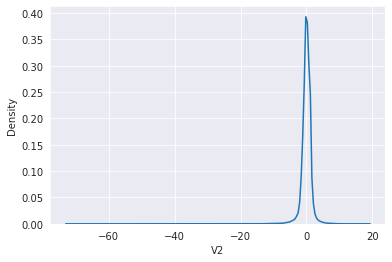




count    284315.000000
mean          0.012171
std           1.459429
min         -48.325589
25%          -0.884541
50%           0.182158
75%           1.028372
max           9.382558
Name: V3, dtype: float64


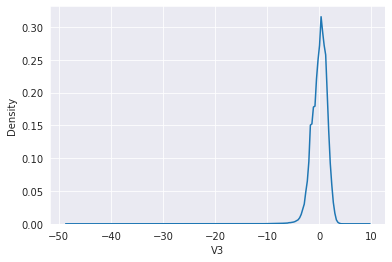




count    284315.000000
mean         -0.007860
std           1.399333
min          -5.683171
25%          -0.850077
50%          -0.022405
75%           0.737624
max          16.875344
Name: V4, dtype: float64


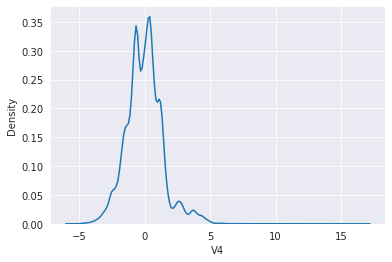




count    284315.000000
mean          0.005453
std           1.356952
min        -113.743307
25%          -0.689398
50%          -0.053457
75%           0.612181
max          34.801666
Name: V5, dtype: float64


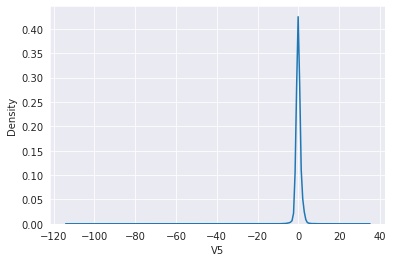




count    284315.000000
mean          0.002419
std           1.329913
min         -26.160506
25%          -0.766847
50%          -0.273123
75%           0.399619
max          73.301626
Name: V6, dtype: float64


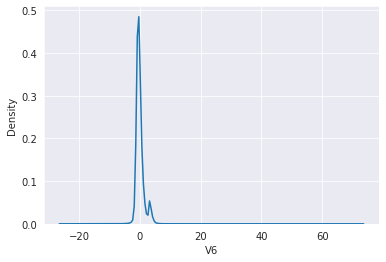




count    284315.000000
mean          0.009637
std           1.178812
min         -31.764946
25%          -0.551442
50%           0.041138
75%           0.571019
max         120.589494
Name: V7, dtype: float64


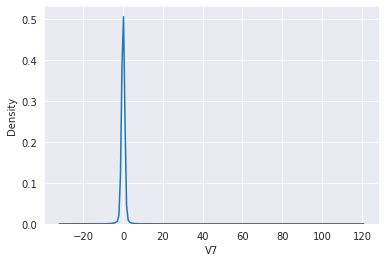




count    284315.000000
mean         -0.000987
std           1.161283
min         -73.216718
25%          -0.208633
50%           0.022041
75%           0.326200
max          18.709255
Name: V8, dtype: float64


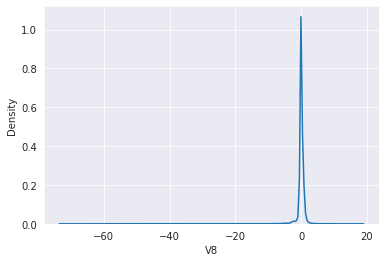




count    284315.000000
mean          0.004467
std           1.089372
min          -6.290730
25%          -0.640412
50%          -0.049964
75%           0.598230
max          15.594995
Name: V9, dtype: float64


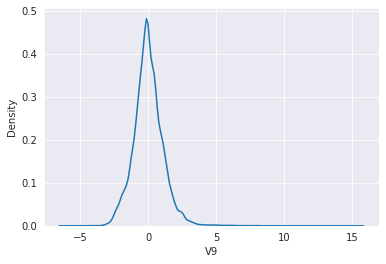




count    284315.000000
mean          0.009824
std           1.044204
min         -14.741096
25%          -0.532880
50%          -0.091872
75%           0.455135
max          23.745136
Name: V10, dtype: float64


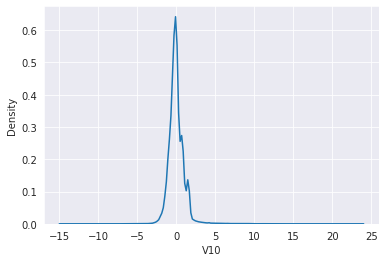




count    284315.000000
mean         -0.006576
std           1.003112
min          -4.797473
25%          -0.763447
50%          -0.034923
75%           0.736362
max          10.002190
Name: V11, dtype: float64


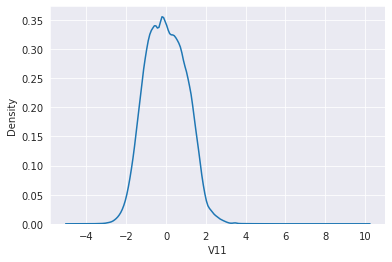




count    284315.000000
mean          0.010832
std           0.945939
min         -15.144988
25%          -0.402102
50%           0.141679
75%           0.619207
max           7.848392
Name: V12, dtype: float64


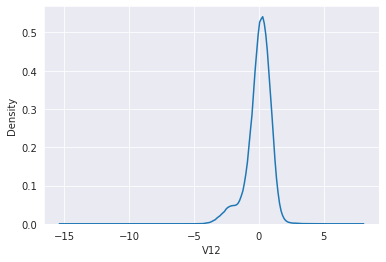




count    284315.000000
mean          0.000189
std           0.995067
min          -5.791881
25%          -0.648067
50%          -0.013547
75%           0.662492
max           7.126883
Name: V13, dtype: float64


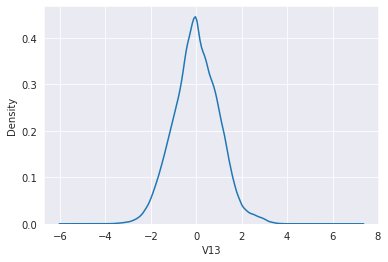




count    284315.000000
mean          0.012064
std           0.897007
min         -18.392091
25%          -0.422453
50%           0.051947
75%           0.494104
max          10.526766
Name: V14, dtype: float64


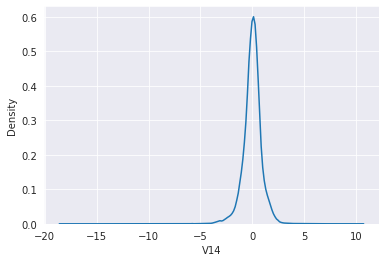




count    284315.000000
mean          0.000161
std           0.915060
min          -4.391307
25%          -0.582812
50%           0.048294
75%           0.648842
max           8.877742
Name: V15, dtype: float64


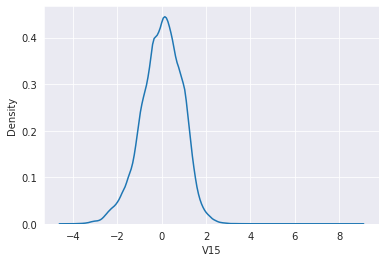




count    284315.000000
mean          0.007164
std           0.844772
min         -10.115560
25%          -0.465543
50%           0.067377
75%           0.523738
max          17.315112
Name: V16, dtype: float64


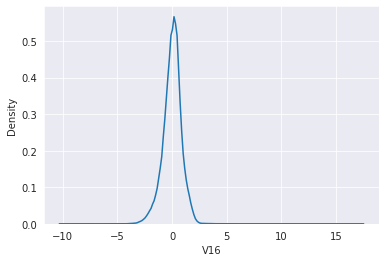




count    284315.000000
mean          0.011535
std           0.749457
min         -17.098444
25%          -0.482644
50%          -0.064833
75%           0.399922
max           9.253526
Name: V17, dtype: float64


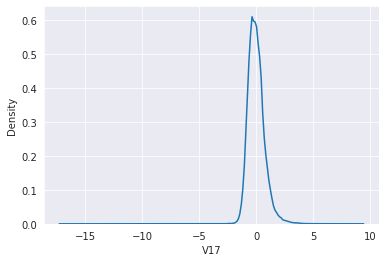




count    284315.000000
mean          0.003887
std           0.824919
min          -5.366660
25%          -0.497414
50%          -0.002787
75%           0.501103
max           5.041069
Name: V18, dtype: float64


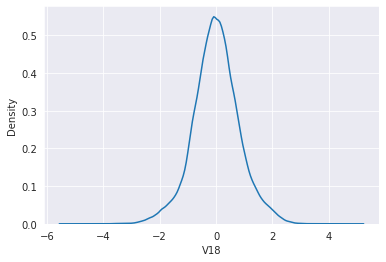




count    284315.000000
mean         -0.001178
std           0.811733
min          -7.213527
25%          -0.456366
50%           0.003117
75%           0.457499
max           5.591971
Name: V19, dtype: float64


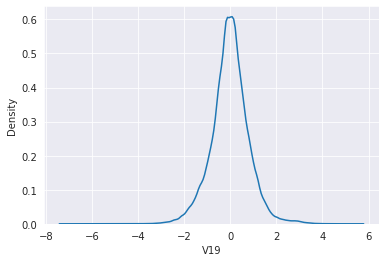




count    284315.000000
mean         -0.000644
std           0.769404
min         -54.497720
25%          -0.211764
50%          -0.062646
75%           0.132401
max          39.420904
Name: V20, dtype: float64


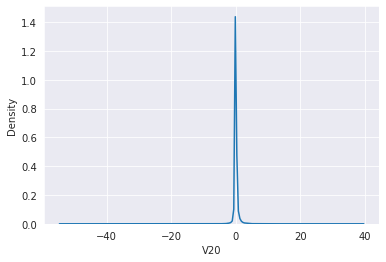




count    284315.000000
mean         -0.001235
std           0.716743
min         -34.830382
25%          -0.228509
50%          -0.029821
75%           0.185626
max          22.614889
Name: V21, dtype: float64


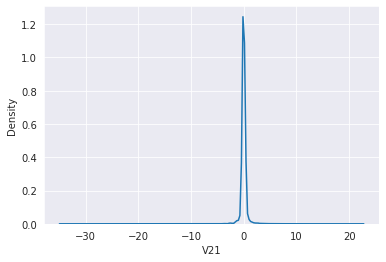




count    284315.000000
mean         -0.000024
std           0.723668
min         -10.933144
25%          -0.542403
50%           0.006736
75%           0.528407
max          10.503090
Name: V22, dtype: float64


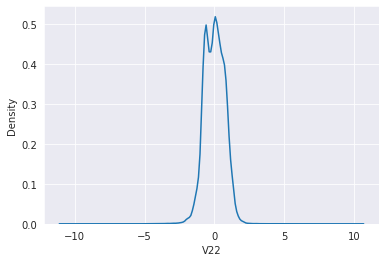




count    284315.000000
mean          0.000070
std           0.621541
min         -44.807735
25%          -0.161702
50%          -0.011147
75%           0.147522
max          22.528412
Name: V23, dtype: float64


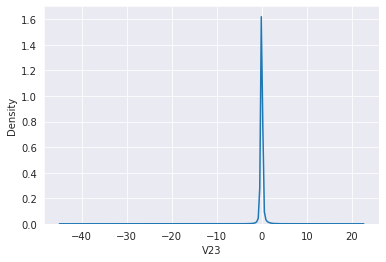




count    284315.000000
mean          0.000182
std           0.605776
min          -2.836627
25%          -0.354425
50%           0.041082
75%           0.439869
max           4.584549
Name: V24, dtype: float64


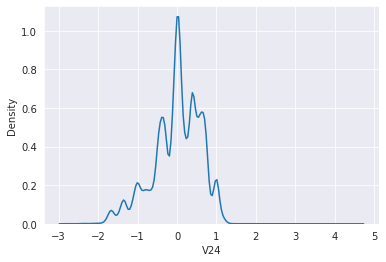




count    284315.000000
mean         -0.000072
std           0.520673
min         -10.295397
25%          -0.317145
50%           0.016417
75%           0.350594
max           7.519589
Name: V25, dtype: float64


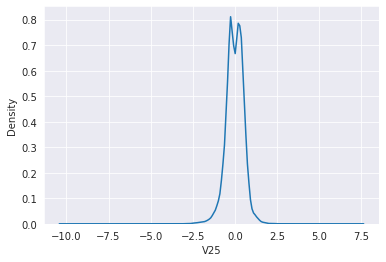




count    284315.000000
mean         -0.000089
std           0.482241
min          -2.604551
25%          -0.327074
50%          -0.052227
75%           0.240671
max           3.517346
Name: V26, dtype: float64


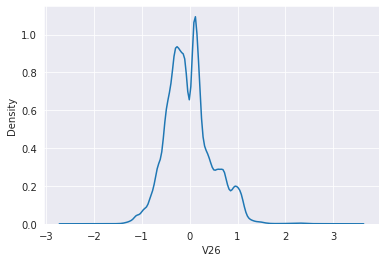




count    284315.000000
mean         -0.000295
std           0.399847
min         -22.565679
25%          -0.070852
50%           0.001230
75%           0.090573
max          31.612198
Name: V27, dtype: float64


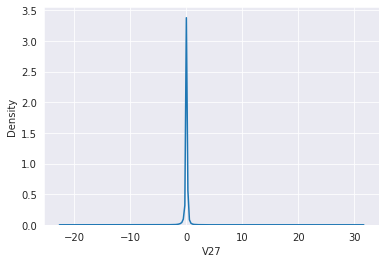




count    284315.000000
mean         -0.000131
std           0.329570
min         -15.430084
25%          -0.052950
50%           0.011199
75%           0.077962
max          33.847808
Name: V28, dtype: float64


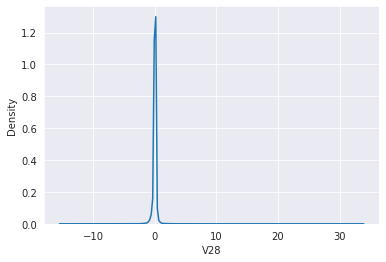




count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


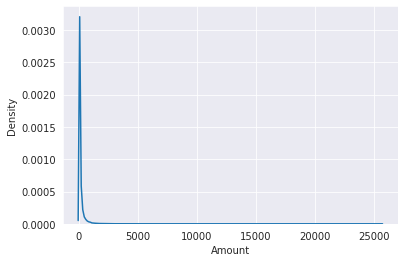




count    284315.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Class, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


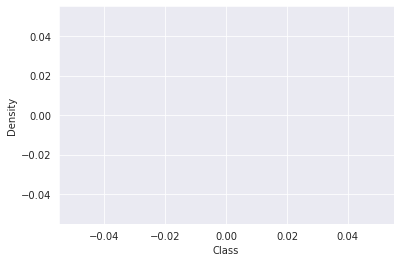

In [11]:
# column distributions of not fraud cases
for col in df.columns:
    print(df.loc[df['Class']==0,col].describe())
    sns.kdeplot(x=col, data=df[df['Class']==0])
    plt.show()
    print("\n\n")

## Scaling

In [12]:
rbs = RobustScaler()
df['Time'] = rbs.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rbs.fit_transform(df['Amount'].values.reshape(-1,1))
df[['Time','Amount']].head()

,Time,Amount
0,-0.994983,1.783274
1,-0.994983,-0.269825
2,-0.994972,4.983721
3,-0.994972,1.418291
4,-0.994960,0.670579


## Train test datasets

In [13]:
X = df.drop('Class', axis=1)
Y = df['Class'].values
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [14]:
trainX,testX,trainY,testY = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)

## Modelling

In [15]:
%%time

clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf.fit(trainX,trainY)

y_pred = clf.predict(testX)

CPU times: user 5min 53s, sys: 499 ms, total: 5min 54s
Wall time: 1min 31s


In [16]:
roc_auc_score(testY, y_pred)

0.891027555297694

## Rebalancing the dataset

In [17]:
smt = SMOTE(random_state=0)
X_smote,Y_smote = smt.fit_resample(trainX,trainY)

### Random Forest

In [18]:
%%time

clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=True)
clf.fit(X_smote,Y_smote)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min


CPU times: user 10min 2s, sys: 348 ms, total: 10min 3s
Wall time: 2min 35s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomForestClassifier(n_jobs=4, verbose=True)

In [19]:
y_pred = clf.predict(testX)
roc_auc_score(testY, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


0.920704145474782

### XGBoost

In [20]:
%%time

# XGBoost
model_xgb = xgb.XGBClassifier(max_depth=2,eval_metric='auc')
model_xgb.fit(X_smote,Y_smote)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


CPU times: user 3min 49s, sys: 232 ms, total: 3min 49s
Wall time: 59.2 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [23]:
print("Train AUC score")
roc_auc_score(trainY, model_xgb.predict(trainX))

Train AUC score


0.9848369554254268

In [22]:
y_pred = model_xgb.predict(testX)
roc_auc_score(testY, y_pred)

0.9404883647999699

   X_attr  Feat_Imp
14    V14  0.418834
4      V4  0.087216
12    V12  0.085616
10    V10  0.050856
8      V8  0.035298
13    V13  0.028553
21    V21  0.018918
2      V2  0.017706
9      V9  0.017002
0    Time  0.015510


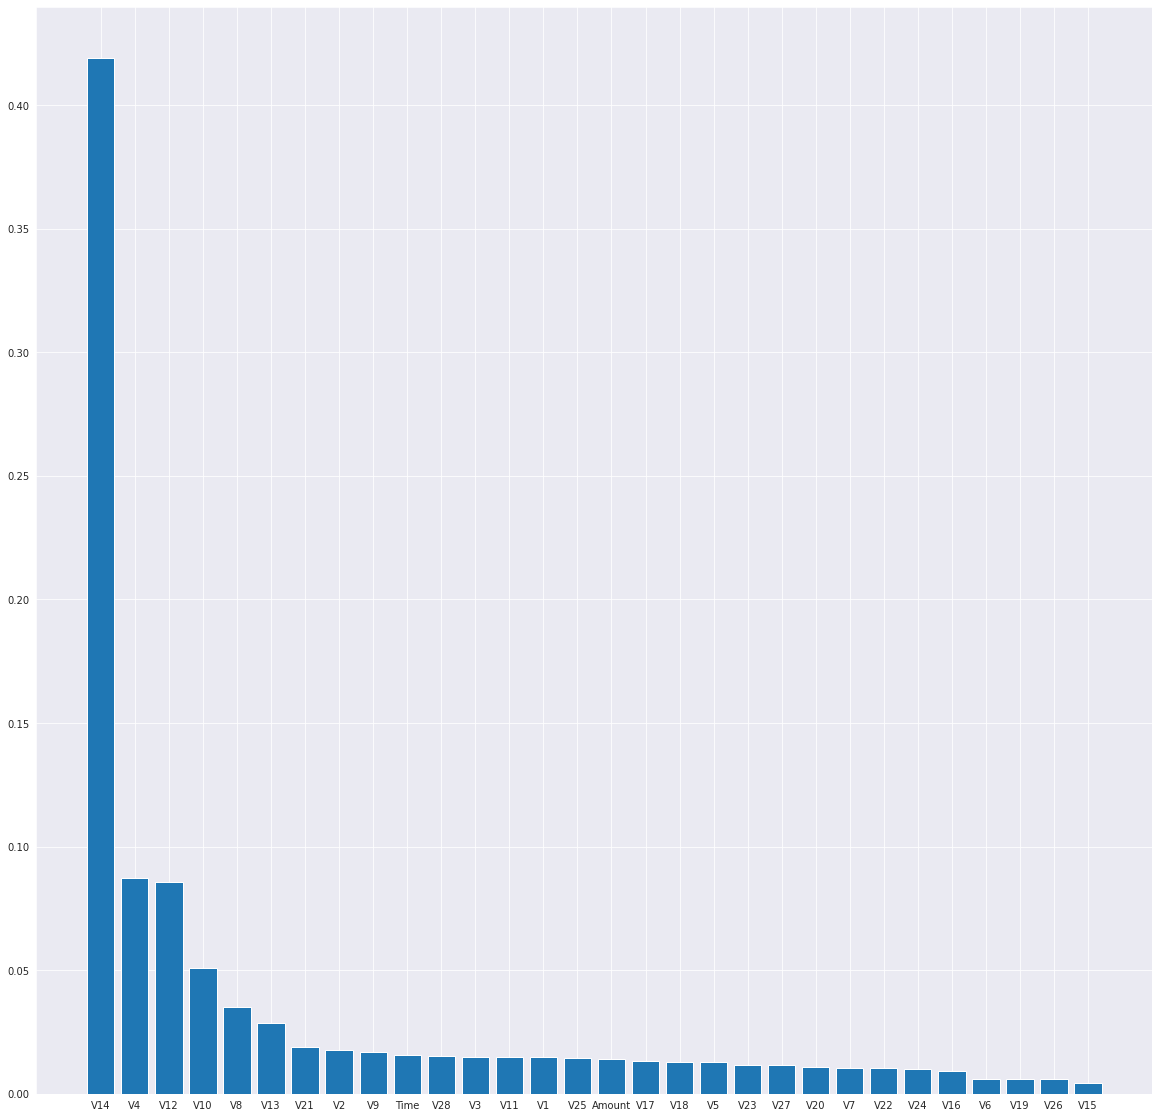

In [24]:
# plot
feat_imp = pd.DataFrame({'X_attr':list(X_smote.columns), 'Feat_Imp':model_xgb.feature_importances_})
feat_imp.sort_values(by='Feat_Imp', ascending=False, inplace=True)

print(feat_imp.head(10))

plt.subplots(figsize=(20,20))
plt.bar(feat_imp['X_attr'], feat_imp['Feat_Imp'])
plt.show()

In [31]:
imp_pred = list(feat_imp['X_attr'][:6])
imp_pred

['V14', 'V4', 'V12', 'V10', 'V8', 'V13']

In [32]:
%%time

# XGBoost
model_xgb = xgb.XGBClassifier(max_depth=2,eval_metric='auc')
model_xgb.fit(X_smote[imp_pred],Y_smote)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


CPU times: user 57.8 s, sys: 56.3 ms, total: 57.9 s
Wall time: 15.8 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [33]:
y_pred = model_xgb.predict(testX[imp_pred])
roc_auc_score(testY, y_pred)

0.9395912665957508

Selecting important feature doesn't improve the model.